In [ ]:
#Load all libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import time


# Set display options for pandas
display_options = {
    'display.max_columns': None,
    'display.width': 1000,
}
for option, value in display_options.items():
    pd.set_option(option, value)

# Set seaborn style for visualization
sns.set_style("darkgrid")

# Check TensorFlow and Keras versions
# Check TensorFlow and Keras versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.version.VERSION)


TensorFlow version: 2.18.0
Keras version: 2.18.0


In [ ]:
# Load dataset
# Step 2: Load the phishing website dataset
dataset_path = "/content/dataset_full.csv"
data = pd.read_csv(dataset_path)

# Display basic information about the dataset
print("Dataset loaded successfully!")
print("Dataset shape:", data.shape)
print("First five rows:")
print(data.head())

Dataset loaded successfully!
Dataset shape: (88647, 112)
First five rows:
   qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  qty_percent_url  qty_tld_url  length_url  qty_dot_domain  qty_hyphen_domain  qty_underline_domain  qty_slash_domain  qty_questionmark_domain  qty_equal_domain  qty_at_domain  qty_and_domain  qty_exclamation_domain  qty_space_domain  qty_tilde_domain  qty_comma_domain  qty_plus_domain  qty_asterisk_domain  qty_hashtag_domain  qty_dollar_domain  qty_percent_domain  qty_vowels_domain  domain_length  domain_in_ip  server_client_domain  qty_dot_directory  qty_hyphen_directory  qty_underline_directory  qty_slash_directory  qty_questionmark_directory  qty_equal_directory  qty_at_directory  qty_and_directory  qty_exclamation_directory  qty_space_directory  qty_tilde_

In [ ]:
# Step 3: Preprocess the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Handle missing values
data = data.dropna()

# Remove duplicate rows
data = data.drop_duplicates()

# Convert boolean features to integer
boolean_columns = ['email_in_url', 'domain_in_ip', 'server_client_domain', 'tld_present_params', 'domain_spf', 'tls_ssl_certificate', 'url_google_index', 'domain_google_index', 'url_shortened', 'phishing']
data[boolean_columns] = data[boolean_columns].astype(int)

# Identify numerical columns
numerical_columns = [col for col in data.columns if col not in boolean_columns]

# Standardize numerical features using StandardScaler
scaler_standard = StandardScaler()
data[numerical_columns] = scaler_standard.fit_transform(data[numerical_columns])

# Normalize numerical features using MinMaxScaler
scaler_minmax = MinMaxScaler()
data[numerical_columns] = scaler_minmax.fit_transform(data[numerical_columns])

# Save the cleaned dataset as newphishdata.csv
cleaned_dataset_path = "newphishdata.csv"
data.to_csv(cleaned_dataset_path, index=False)

print("Dataset preprocessing completed. Cleaned dataset saved as", cleaned_dataset_path)



<ipython-input-7-40d0bd05b13f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[boolean_columns] = data[boolean_columns].astype(int)
<ipython-input-7-40d0bd05b13f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_columns] = scaler_standard.fit_transform(data[numerical_columns])


Dataset preprocessing completed. Cleaned dataset saved as newphishdata.csv



Summary Statistics:
        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  qty_percent_url   qty_tld_url    length_url  qty_dot_domain  qty_hyphen_domain  qty_underline_domain  qty_slash_domain  qty_questionmark_domain  qty_equal_domain  qty_at_domain  qty_and_domain  qty_exclamation_domain  qty_space_domain  qty_tilde_domain  qty_comma_domain  qty_plus_domain  qty_asterisk_domain  qty_hashtag_domain  qty_dollar_domain  qty_percent_domain  qty_vowels_domain  domain_length  domain_in_ip  server_client_domain  qty_dot_directory  qty_hyphen_directory  qty_underline_directory  qty_slash_directory  qty_questionmark_directory  qty_equal_directory  qty_at_directory  qty_and_directory  qty_exclamation_directory  qty_space_directory  qty_tilde_directory  qty_comma_directory  qty_plus_d

<ipython-input-8-69696e36bbf0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='phishing', data=data, palette='coolwarm')


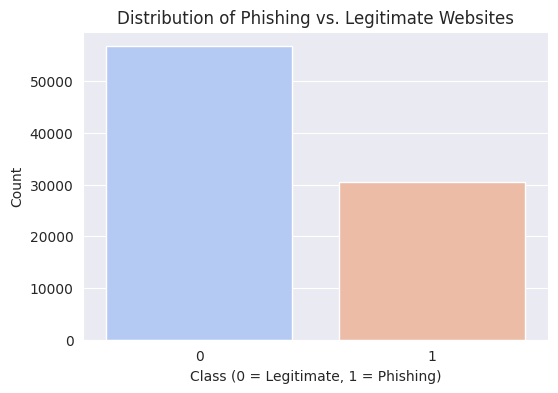

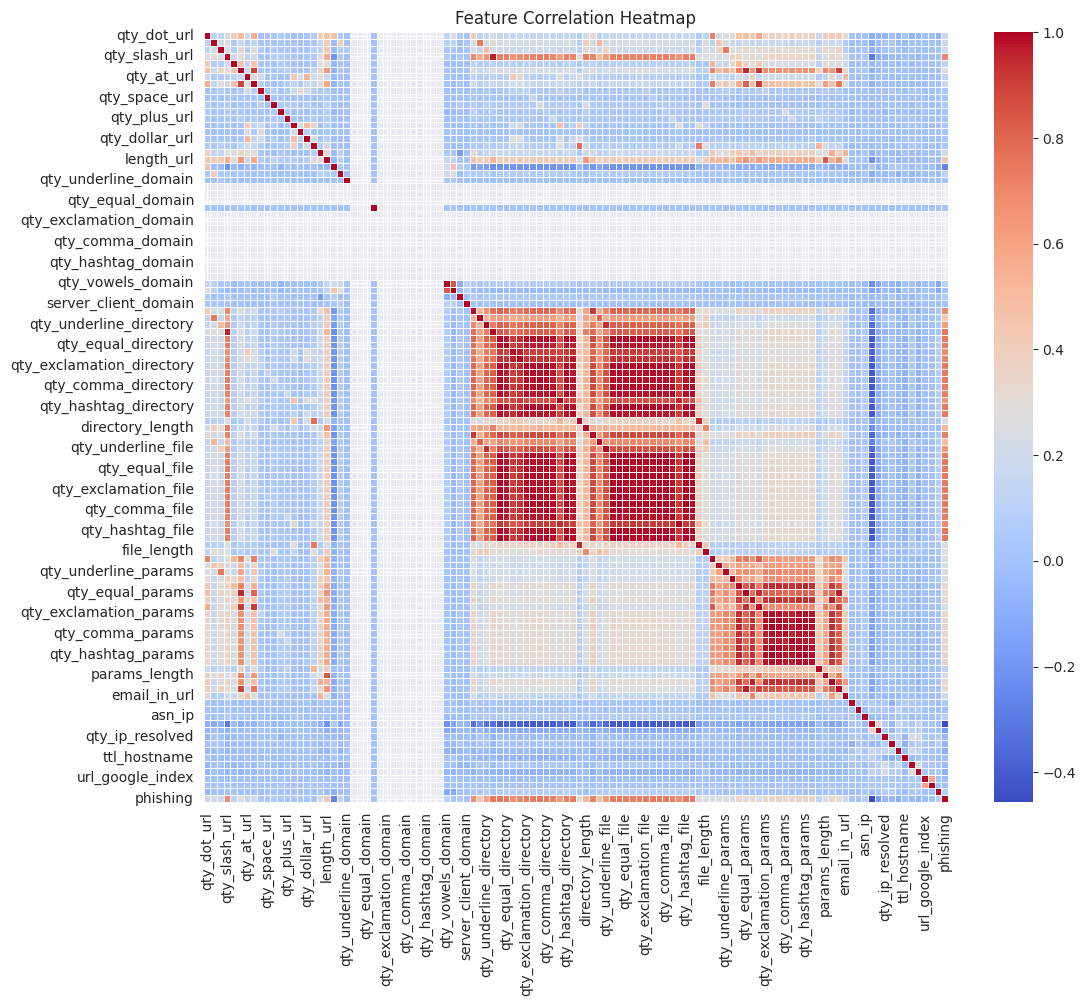

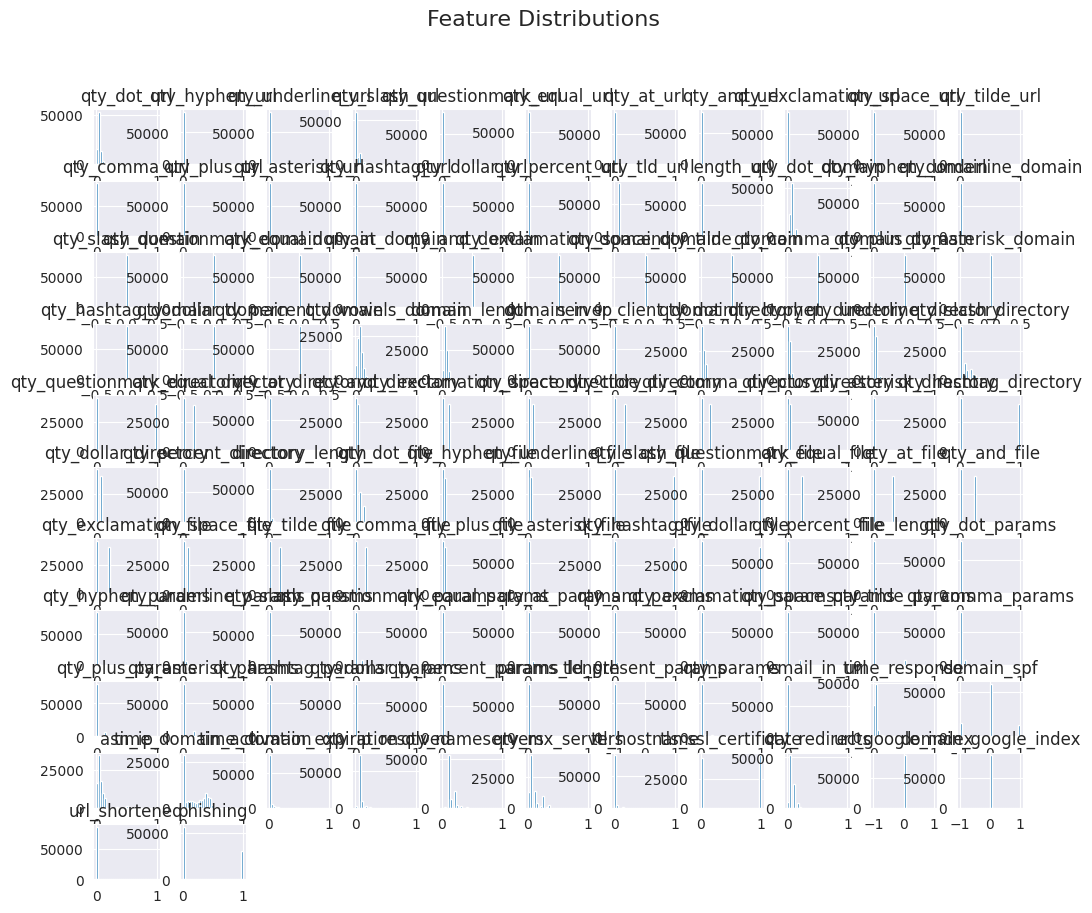

In [ ]:
# Step 4: Exploratory Data Analysis (EDA)
# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Plot distribution of phishing vs. legitimate websites
plt.figure(figsize=(6,4))
sns.countplot(x='phishing', data=data, palette='coolwarm')
plt.title("Distribution of Phishing vs. Legitimate Websites")
plt.xlabel("Class (0 = Legitimate, 1 = Phishing)")
plt.ylabel("Count")
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Visualize feature distributions
data.hist(figsize=(12,10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [ ]:
# Step 5: Split the dataset into training (80%) and testing (20%) sets
X = data.drop(columns=['phishing'])  # Features
y = data['phishing']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dataset successfully split into training and testing sets.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Dataset successfully split into training and testing sets.
Training set shape: (69767, 111)
Testing set shape: (17442, 111)


In [ ]:
# Step 6: Create a deep learning binary classification model (CNN-based)
from tensorflow.keras.layers import Conv1D, Flatten

#X_train = np.expand_dims(X_train, axis=-1)  # Reshape for CNN compatibility
#X_test = np.expand_dims(X_test, axis=-1)

X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)  # Correct reshaping for Conv1D
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()

# Input layer - Adjust the number of filters and kernel size as needed
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout rate can be modified

# Optional LSTM layer - Uncomment to use
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))  # Change units as needed
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Change optimizer and learning rate here
    loss='binary_crossentropy',  # Modify loss function if needed
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']  # Additional evaluation metrics
)

# Model Summary
model.summary()

# Define callbacks (early stopping to prevent overfitting)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with per-epoch time tracking
epoch_times = []

def on_epoch_begin(epoch, logs=None):
    global epoch_start_time
    epoch_start_time = time.time()

def on_epoch_end(epoch, logs=None):
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)
    print(f"Epoch {epoch+1} Training Time: {epoch_time:.2f} seconds")

time_callback = keras.callbacks.LambdaCallback(on_epoch_begin=on_epoch_begin, on_epoch_end=on_epoch_end)

start_time = time.time()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,  # Adjust number of epochs
    batch_size=32,  # Modify batch size
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

print("Model training complete.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 109, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 109, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3488)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         446,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 455,041 (1.74 MB)

 Trainable params: 455,041 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - AUC: 0.9618 - Precision: 0.8348 - Recall: 0.9065 - accuracy: 0.9040 - loss: 0.2334 - val_AUC: 0.9801 - val_Precision: 0.8026 - val_Recall: 0.9675 - val_accuracy: 0.9055 - val_loss: 0.2018
Epoch 2/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - AUC: 0.9773 - Precision: 0.8769 - Recall: 0.9108 - accuracy: 0.9239 - loss: 0.1822 - val_AUC: 0.9823 - val_Precision: 0.8951 - val_Recall: 0.9126 - val_accuracy: 0.9321 - val_loss: 0.1616
Epoch 3/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - AUC: 0.9771 - Precision: 0.8785 - Recall: 0.9130 - accuracy: 0.9254 - loss: 0.1824 - val_AUC: 0.9836 - val_Precision: 0.9347 - val_Recall: 0.8656 - val_accuracy: 0.9318 - val_loss: 0.1643
Epoch 4/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - AUC: 0.9795 - Precision: 0.8854 - Recall: 0.9123 - accuracy: 0.9274 - loss: 0.1731 - val_AUC: 0.9835 - val_Precision: 0.8614 - val_Recall: 0.9551 - val_accuracy: 0.9306 - val_loss: 0.1690
Epoch 5/50
2181/2181

In [ ]:
# Step 8: Generate model predictions and evaluate performance
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC Score: {auc:.4f}")
#print(f"Total Training Time: {total_training_time:.2f} seconds")
print(f"Average Time per Epoch: {np.mean(epoch_times):.2f} seconds")
print("Confusion Matrix:")
print(conf_matrix)


546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Model Evaluation Metrics:
Accuracy: 0.9517
Precision: 0.9474
Recall: 0.9124
AUC Score: 0.9426
Average Time per Epoch: nan seconds
Confusion Matrix:
[[11034   309]
 [  534  5565]]


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# Step 9: Compute and display False Acceptance Rate (FAR) and False Rejection Rate (FRR)
false_positives = conf_matrix[0][1]
false_negatives = conf_matrix[1][0]
true_negatives = conf_matrix[0][0]
true_positives = conf_matrix[1][1]

far = false_positives / (false_positives + true_negatives)  # FAR = FP / (FP + TN)
frr = false_negatives / (false_negatives + true_positives)  # FRR = FN / (FN + TP)

# Display FAR and FRR
print("\nFalse Acceptance Rate (FAR):", round(far, 4))
print("False Rejection Rate (FRR):", round(frr, 4))


False Acceptance Rate (FAR): 0.0272
False Rejection Rate (FRR): 0.0876


In [ ]:
# Save training history
np.save("model_history_CNN.npy", history.history)
hist_cnn = np.load("model_history_CNN.npy", allow_pickle=True).item()

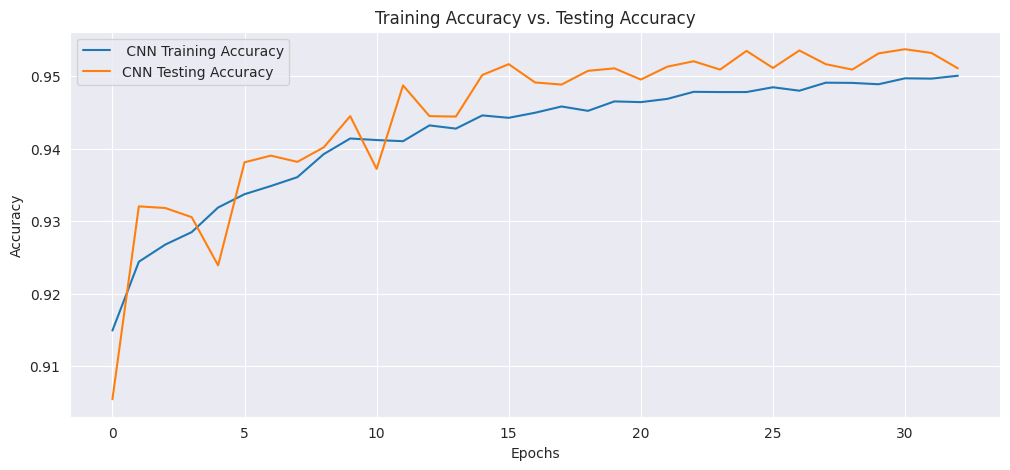

In [ ]:
# Step 10: Plot Training Accuracy vs. Testing Accuracy and Training Loss vs. Testing Loss

# Plot Training Accuracy vs. Testing Accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label=' CNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Testing Accuracy')
plt.title("Training Accuracy vs. Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Training Loss vs. Testing Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='CNN Training Loss')
plt.plot(history.history['val_loss'], label='CNN Testing Loss')
plt.title("Training Loss vs. Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
#THIS STEP IS OPTIONAL. DO THIS WHEN YOU WANT TO DEPLOY FINAL MODEL AT ENDPOINT.

# Save training history. cnahnge name of model here like CNN, RNN, LSTM, etc. here
#np.save("CNN_model_history.npy", history.history)

# Step 11: Save the trained model for deployment
model.save("phishing_detection_CNN_model.keras")
print("Trained model saved as phishing_detection_CNN_model.keras")

Trained model saved as phishing_detection_CNN_model.keras


# **LSTM** (Long Short-Term Memory)

In [ ]:
from tensorflow.keras.layers import LSTM, Reshape

# Reshape data for LSTM input (samples, timesteps, features)
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
lstm_model = Sequential()

# LSTM Layer
lstm_model.add(LSTM(units=64, return_sequences=True, input_shape=(1, X_train.shape[2])))  # First LSTM layer
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=32, return_sequences=False))  # Second LSTM layer
lstm_model.add(Dropout(0.2))

# Fully connected layers
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
lstm_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

# Model summary
lstm_model.summary()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the LSTM model
history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 64)               │          45,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,649 (233.00 KB)

 Trainable params: 59,649 (233.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - AUC: 0.9484 - Precision: 0.8200 - Recall: 0.8757 - accuracy: 0.8912 - loss: 0.2746 - val_AUC: 0.9793 - val_Precision: 0.8799 - val_Recall: 0.9262 - val_accuracy: 0.9300 - val_loss: 0.1790
Epoch 2/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.9761 - Precision: 0.8779 - Recall: 0.9106 - accuracy: 0.9239 - loss: 0.1871 - val_AUC: 0.9800 - val_Precision: 0.9395 - val_Recall: 0.8175 - val_accuracy: 0.9178 - val_loss: 0.1874
Epoch 3/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - AUC: 0.9780 - Precision: 0.8862 - Recall: 0.9056 - accuracy: 0.9264 - loss: 0.1795 - val_AUC: 0.9808 - val_Precision: 0.9112 - val_Recall: 0.8813 - val_accuracy: 0.9284 - val_loss: 0.1746
Epoch 4/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - AUC: 0.9785 - Precision: 0.8839 - Recall: 0.9126 - accuracy: 0.9282 - loss: 0.1765 - val_AUC: 0.9817 - val_Precision: 0.8824 - val_Recall: 0.9305 - val_accuracy: 0.9323 - val_loss: 0.1666
Epoch 5/50
2181/2181 

In [ ]:
# Evaluate the model
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype(int)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
auc_lstm = roc_auc_score(y_test, y_pred_lstm)
conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)

# Print results
print("\nLSTM Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_lstm:.4f}")
print(f"Precision: {precision_lstm:.4f}")
print(f"Recall: {recall_lstm:.4f}")
print(f"AUC Score: {auc_lstm:.4f}")
print("Confusion Matrix:")
print(conf_matrix_lstm)

# Save training history
np.save("model_history_LSTM.npy", history_lstm.history)

546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

LSTM Model Evaluation Metrics:
Accuracy: 0.9553
Precision: 0.9335
Recall: 0.9390
AUC Score: 0.9515
Confusion Matrix:
[[10935   408]
 [  372  5727]]


In [ ]:
# Step 9: Compute and display False Acceptance Rate (FAR) and False Rejection Rate (FRR) for LSTM
false_positives_lstm = conf_matrix_lstm[0][1]
false_negatives_lstm = conf_matrix_lstm[1][0]
true_negatives_lstm = conf_matrix_lstm[0][0]
true_positives_lstm = conf_matrix_lstm[1][1]

far_lstm = false_positives_lstm / (false_positives_lstm + true_negatives_lstm)  # FAR = FP / (FP + TN)
frr_lstm = false_negatives_lstm / (false_negatives_lstm + true_positives_lstm)  # FRR = FN / (FN + TP)

# Display FAR and FRR for LSTM
print("\nLSTM False Acceptance Rate (FAR):", round(far_lstm, 4))
print("LSTM False Rejection Rate (FRR):", round(frr_lstm, 4))

# Save training history for LSTM
np.save("model_history_LSTM.npy", history_lstm.history)
hist_lstm = np.load("model_history_LSTM.npy", allow_pickle=True).item()




LSTM False Acceptance Rate (FAR): 0.036
LSTM False Rejection Rate (FRR): 0.061


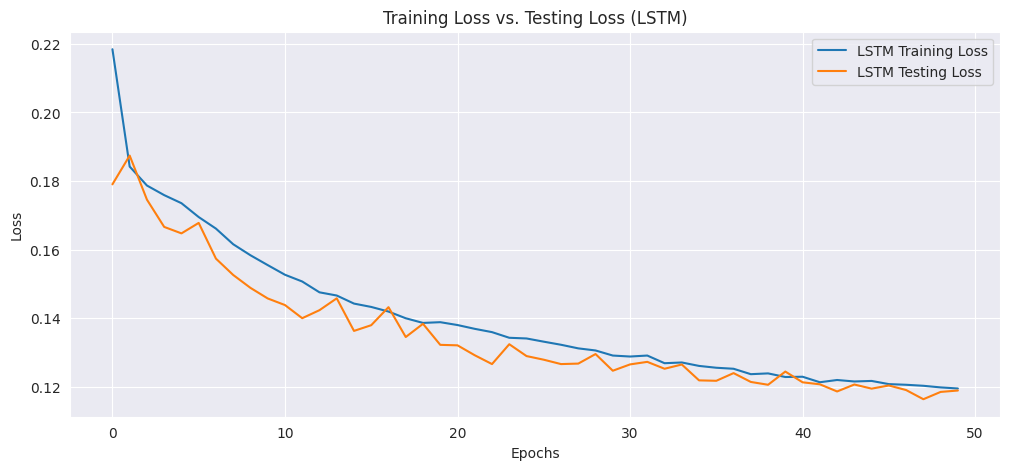

In [ ]:
# Step 10: Plot Training Accuracy vs. Testing Accuracy and Training Loss vs. Testing Loss for LSTM

# Plot Training Accuracy vs. Testing Accuracy for LSTM
plt.figure(figsize=(12, 5))
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Testing Accuracy')
plt.title("Training Accuracy vs. Testing Accuracy (LSTM)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Training Loss vs. Testing Loss for LSTM
plt.figure(figsize=(12, 5))
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Testing Loss')
plt.title("Training Loss vs. Testing Loss (LSTM)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame to store metrics
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "AUC Score", "FAR", "FRR"],
    "CNN Model": [accuracy, precision, recall, auc, far, frr],
    "LSTM Model": [accuracy_lstm, precision_lstm, recall_lstm, auc_lstm, far_lstm, frr_lstm]
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Print the table
print(metrics_df)



      Metric  CNN Model  LSTM Model
0   Accuracy   0.952184    0.955280
1  Precision   0.939703    0.933496
2     Recall   0.922446    0.939006
3  AUC Score   0.945310    0.951519
4        FAR   0.031826    0.035969
5        FRR   0.077554    0.060994


*CNN SEEMS TO BE A BETTER MODEL HERE*

## Hybrid Approach with **lstm + GRU**

LSTM captures long-term dependencies, followed by a GRU layer to refine the sequential features with lower computational cost.

Dropout layers for regularization,Binary classification with sigmoid activation

*Flow/Architecture*

LSTM LAYER → Dropout → GRU Layer → Dropout → Dense Layers

# **Deep Q-Network (DQN)**

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# # Assuming X_train, X_test, y_train, y_test are already defined from preprocessing

# # Define Deep Q-Network (DQN) model
# dqn_model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     Dropout(0.2),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')  # Binary classification
# ])

# # Compile the model
# dqn_model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     loss='binary_crossentropy',
#     metrics=['accuracy', 'Precision', 'Recall', 'AUC']
# )

# # Train the model
# history_dqn = dqn_model.fit(
#     X_train, y_train,
#     epochs=50,
#     batch_size=32,
#     validation_data=(X_test, y_test),
#     callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
#     verbose=1
# )


#option2
# # Ensure input shape is flat for DQN
# X_train_dqn = X_train.reshape(X_train.shape[0], X_train.shape[2])  # Shape: (None, 111)
# X_test_dqn = X_test.reshape(X_test.shape[0], X_test.shape[2])      # Shape: (None, 111)

# Reshape data from (samples, features, 1) → (samples, features)
X_train_dqn = X_train.reshape(X_train.shape[0], X_train.shape[1])  # Shape: (69767, 111)
X_test_dqn = X_test.reshape(X_test.shape[0], X_test.shape[1])      # Shape: (17442, 111)



# Define DQN Model (Fully Connected Layers)
dqn_model = Sequential([
    Dense(128, activation='relu', input_shape=(111,)),  # Adjust input shape
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
dqn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

# # Train the model with corrected input
# history_dqn = dqn_model.fit(
#     X_train_dqn, y_train,  # Use reshaped input
#     epochs=50,
#     batch_size=32,
#     validation_data=(X_test_dqn, y_test),  # Use reshaped input
#     callbacks=[early_stopping],
#     verbose=1
# )
# Use the reshaped data for training
history_dqn = dqn_model.fit(
    X_train_dqn, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_dqn, y_test),
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.9499 - Precision: 0.8143 - Recall: 0.8886 - accuracy: 0.8923 - loss: 0.2556 - val_AUC: 0.9807 - val_Precision: 0.9169 - val_Recall: 0.8667 - val_accuracy: 0.9259 - val_loss: 0.1744
Epoch 2/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.9785 - Precision: 0.8824 - Recall: 0.9147 - accuracy: 0.9273 - loss: 0.1772 - val_AUC: 0.9829 - val_Precision: 0.8919 - val_Recall: 0.9251 - val_accuracy: 0.9346 - val_loss: 0.1595
Epoch 3/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - AUC: 0.9810 - Precision: 0.8928 - Recall: 0.9116 - accuracy: 0.9309 - loss: 0.1673 - val_AUC: 0.9841 - val_Precision: 0.9225 - val_Recall: 0.8862 - val_accuracy: 0.9342 - val_loss: 0.1580
Epoch 4/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.9813 - Precision: 0.8933 - Recall: 0.9100 - accuracy: 0.9311 - loss: 0.1655 - val_AUC: 0.9857 - val_Precision: 0.8512 - val_Recall: 0.9647 - val_accuracy: 0.9287 - val_loss: 0.1617
Epoch 5/50
2181/2181 ━━

546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step

🔹 DQN Model Evaluation Metrics:
Accuracy: 0.9477
Precision: 0.9205
Recall: 0.9306
AUC Score: 0.9437
Confusion Matrix:
 [[10853   490]
 [  423  5676]]


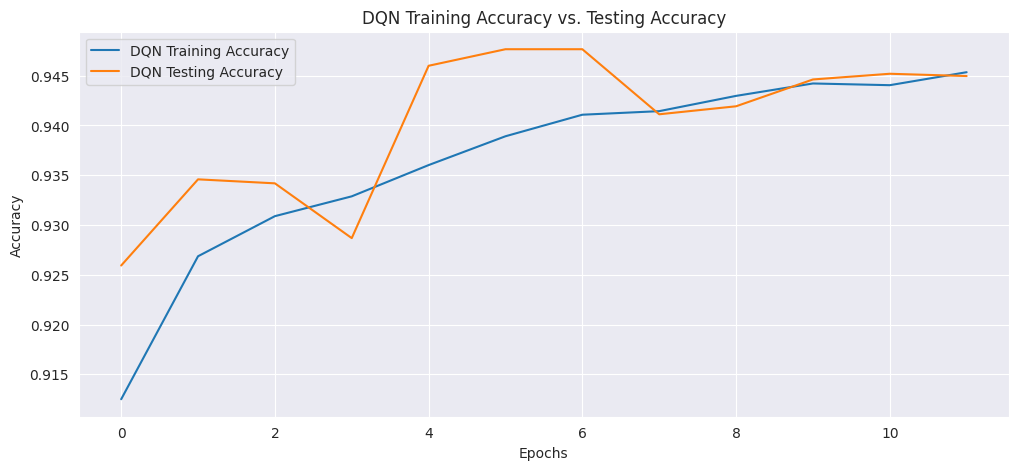

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Generate predictions for DQN
y_pred_dqn = (dqn_model.predict(X_test) > 0.5).astype(int)

# Compute evaluation metrics for DQN
accuracy_dqn = accuracy_score(y_test, y_pred_dqn)
precision_dqn = precision_score(y_test, y_pred_dqn)
recall_dqn = recall_score(y_test, y_pred_dqn)
auc_dqn = roc_auc_score(y_test, y_pred_dqn)
conf_matrix_dqn = confusion_matrix(y_test, y_pred_dqn)

print("\n🔹 DQN Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_dqn:.4f}")
print(f"Precision: {precision_dqn:.4f}")
print(f"Recall: {recall_dqn:.4f}")
print(f"AUC Score: {auc_dqn:.4f}")
print("Confusion Matrix:\n", conf_matrix_dqn)

# Plot Training Accuracy vs. Testing Accuracy
plt.figure(figsize=(12, 5))
plt.plot(history_dqn.history['accuracy'], label='DQN Training Accuracy')
plt.plot(history_dqn.history['val_accuracy'], label='DQN Testing Accuracy')
plt.title("DQN Training Accuracy vs. Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Training Loss vs. Testing Loss
plt.figure(figsize=(12, 5))
plt.plot(history_dqn.history['loss'], label='DQN Training Loss')
plt.plot(history_dqn.history['val_loss'], label='DQN Testing Loss')
plt.title("DQN Training Loss vs. Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# **Deep Autoencoder (DAE) model**

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Reshape

# # Reshape data for Autoencoder input
# X_train = np.array(X_train)
# X_test = np.array(X_test)

# # Build the Deep Autoencoder model
# dae_model = Sequential()

# # Encoder Layers
# dae_model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
# dae_model.add(Dropout(0.2))
# dae_model.add(Dense(units=64, activation='relu'))  # Hidden layer
# dae_model.add(Dropout(0.2))
# dae_model.add(Dense(units=32, activation='relu'))  # Bottleneck layer (compressed representation)

# # Decoder Layers
# dae_model.add(Dense(units=64, activation='relu'))  # Hidden layer
# dae_model.add(Dropout(0.2))
# dae_model.add(Dense(units=128, activation='relu'))  # Hidden layer
# dae_model.add(Dropout(0.2))
# dae_model.add(Dense(units=X_train.shape[1], activation='sigmoid'))  # Output layer (reconstruction)

# # Compile the model
# dae_model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     loss='mse',  # Mean Squared Error for reconstruction loss
#     metrics=['mse']
# )

# # Model summary
# dae_model.summary()

# # Define early stopping
# early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the Deep Autoencoder model
# history_dae = dae_model.fit(
#     X_train, X_train,  # Input and output are the same for autoencoder
#     epochs=50,
#     batch_size=32,
#     validation_data=(X_test, X_test),
#     callbacks=[early_stopping],
#     verbose=1
# )

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Ensure input shape is correct for DAE (flatten features)
X_train_dae = X_train.reshape(X_train.shape[0], X_train.shape[1])  # Shape: (None, 111)
X_test_dae = X_test.reshape(X_test.shape[0], X_test.shape[1])      # Shape: (None, 111)

# Build the Deep Autoencoder model
dae_model = Sequential()

# Encoder Layers
dae_model.add(Dense(units=128, activation='relu', input_shape=(X_train_dae.shape[1],)))  # Input layer
dae_model.add(Dropout(0.2))
dae_model.add(Dense(units=64, activation='relu'))  # Hidden layer
dae_model.add(Dropout(0.2))
dae_model.add(Dense(units=32, activation='relu'))  # Bottleneck layer (compressed representation)

# Decoder Layers
dae_model.add(Dense(units=64, activation='relu'))  # Hidden layer
dae_model.add(Dropout(0.2))
dae_model.add(Dense(units=128, activation='relu'))  # Hidden layer
dae_model.add(Dropout(0.2))
dae_model.add(Dense(units=X_train_dae.shape[1], activation='sigmoid'))  # Output layer (reconstruction)

# Compile the model
dae_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',  # Mean Squared Error for reconstruction loss
    metrics=['mse']
)

# Model summary
dae_model.summary()

# Define early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Deep Autoencoder model
history_dae = dae_model.fit(
    X_train_dae, X_train_dae,  # Input and output are the same for autoencoder
    epochs=50,
    batch_size=32,
    validation_data=(X_test_dae, X_test_dae),
    callbacks=[early_stopping],
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 111)                 │          14,319 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,423 (193.06 KB)

 Trainable params: 49,423 (193.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 3/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 4/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 5/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 6/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 7/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 8/50
2181/2181 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 9/50
2181/2181 ━━━━━━━━━━━━━━━━━━

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)



X_train shape: (69767, 111, 1)
X_test shape: (17442, 111, 1)


In [ ]:
# # Generate model predictions for DAE
# reconstructed_X_test = dae_model.predict(X_test_dae)
# reconstruction_errors = np.mean(np.abs(reconstructed_X_test - X_test), axis=1)

# # Set a threshold for classification (mean reconstruction error)
# threshold = np.percentile(reconstruction_errors, 95)  # Adjust percentile as needed
# y_pred_dae = (reconstruction_errors > threshold).astype(int)  # 1 = Phishing, 0 = Legitimate

# # Compute evaluation metrics for DAE
# accuracy_dae = accuracy_score(y_test, y_pred_dae)
# precision_dae = precision_score(y_test, y_pred_dae)
# recall_dae = recall_score(y_test, y_pred_dae)
# auc_dae = roc_auc_score(y_test, y_pred_dae)
# conf_matrix_dae = confusion_matrix(y_test, y_pred_dae)

# print("\n🔹 Deep Autoencoder (DAE) Model Evaluation Metrics:")
# print(f"Accuracy: {accuracy_dae:.4f}")
# print(f"Precision: {precision_dae:.4f}")
# print(f"Recall: {recall_dae:.4f}")
# print(f"AUC Score: {auc_dae:.4f}")
# print("Confusion Matrix:\n", conf_matrix_dae)



# Generate model predictions for DAE
reconstructed_X_test = dae_model.predict(X_test_dae)
#reshaping x test such that 2 dimenstions are there
reconstruction_errors = np.mean(np.abs(reconstructed_X_test - X_test.reshape(X_test.shape[0], X_test.shape[1])), axis=1)

# Set a threshold for classification (mean reconstruction error)
threshold = np.percentile(reconstruction_errors, 95)  # Adjust percentile as needed
y_pred_dae = (reconstruction_errors > threshold).astype(int)  # 1 = Phishing, 0 = Legitimate

# Compute evaluation metrics for DAE
accuracy_dae = accuracy_score(y_test, y_pred_dae)
precision_dae = precision_score(y_test, y_pred_dae)
recall_dae = recall_score(y_test, y_pred_dae)
auc_dae = roc_auc_score(y_test, y_pred_dae)
conf_matrix_dae = confusion_matrix(y_test, y_pred_dae)

print("\n🔹 Deep Autoencoder (DAE) Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_dae:.4f}")
print(f"Precision: {precision_dae:.4f}")
print(f"Recall: {recall_dae:.4f}")
print(f"AUC Score: {auc_dae:.4f}")
print("Confusion Matrix:\n", conf_matrix_dae)





546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step

🔹 Deep Autoencoder (DAE) Model Evaluation Metrics:
Accuracy: 0.6766
Precision: 0.7629
Recall: 0.1092
AUC Score: 0.5455
Confusion Matrix:
 [[11136   207]
 [ 5433   666]]


In [ ]:
# Step 9: Compute and display False Acceptance Rate (FAR) and False Rejection Rate (FRR)
false_positives_dae = conf_matrix_dae[0][1]
false_negatives_dae = conf_matrix_dae[1][0]
true_negatives_dae = conf_matrix_dae[0][0]
true_positives_dae = conf_matrix_dae[1][1]

far_dae = false_positives_dae / (false_positives_dae + true_negatives_dae)  # FAR = FP / (FP + TN)
frr_dae = false_negatives_dae / (false_negatives_dae + true_positives_dae)  # FRR = FN / (FN + TP)

# Display FAR and FRR
print("\nFalse Acceptance Rate (FAR):", round(far_dae, 4))
print("False Rejection Rate (FRR):", round(frr_dae, 4))

# Save training history
np.save("model_history_DAE.npy", history_dae.history)
hist_dae = np.load("model_history_DAE.npy", allow_pickle=True).item()


False Acceptance Rate (FAR): 0.0182
False Rejection Rate (FRR): 0.8908


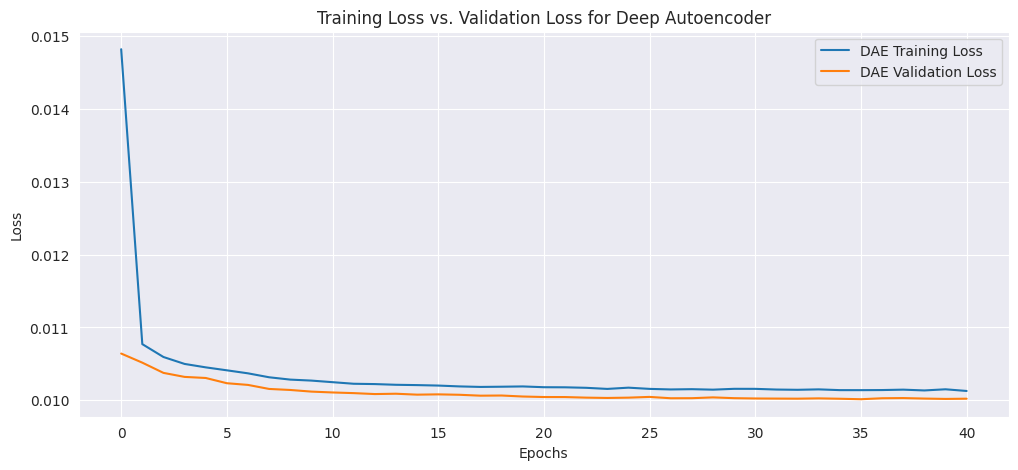

In [ ]:
# Step 10: Plot Training Loss vs. Validation Loss

# Plot Training Loss vs. Validation Loss
plt.figure(figsize=(12, 5))
plt.plot(history_dae.history['loss'], label='DAE Training Loss')
plt.plot(history_dae.history['val_loss'], label='DAE Validation Loss')
plt.title("Training Loss vs. Validation Loss for Deep Autoencoder")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Create evaluation dictionary
eval_metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "AUC Score"],
    "Deep Autoencoder (DAE)": [accuracy_dae, precision_dae, recall_dae, auc_dae],
    "Deep Q-Network (DQN)": [accuracy_dqn, precision_dqn, recall_dqn, auc_dqn]
}

# Convert to DataFrame
df_eval = pd.DataFrame(eval_metrics)

# Display the table
print("\n🔹 Model Evaluation Comparison:")
print(df_eval)



🔹 Model Evaluation Comparison:
      Metric  Deep Autoencoder (DAE)  Deep Q-Network (DQN)
0   Accuracy                0.676643              0.947655
1  Precision                0.762887              0.920532
2     Recall                0.109198              0.930644
3  AUC Score                0.545475              0.943723


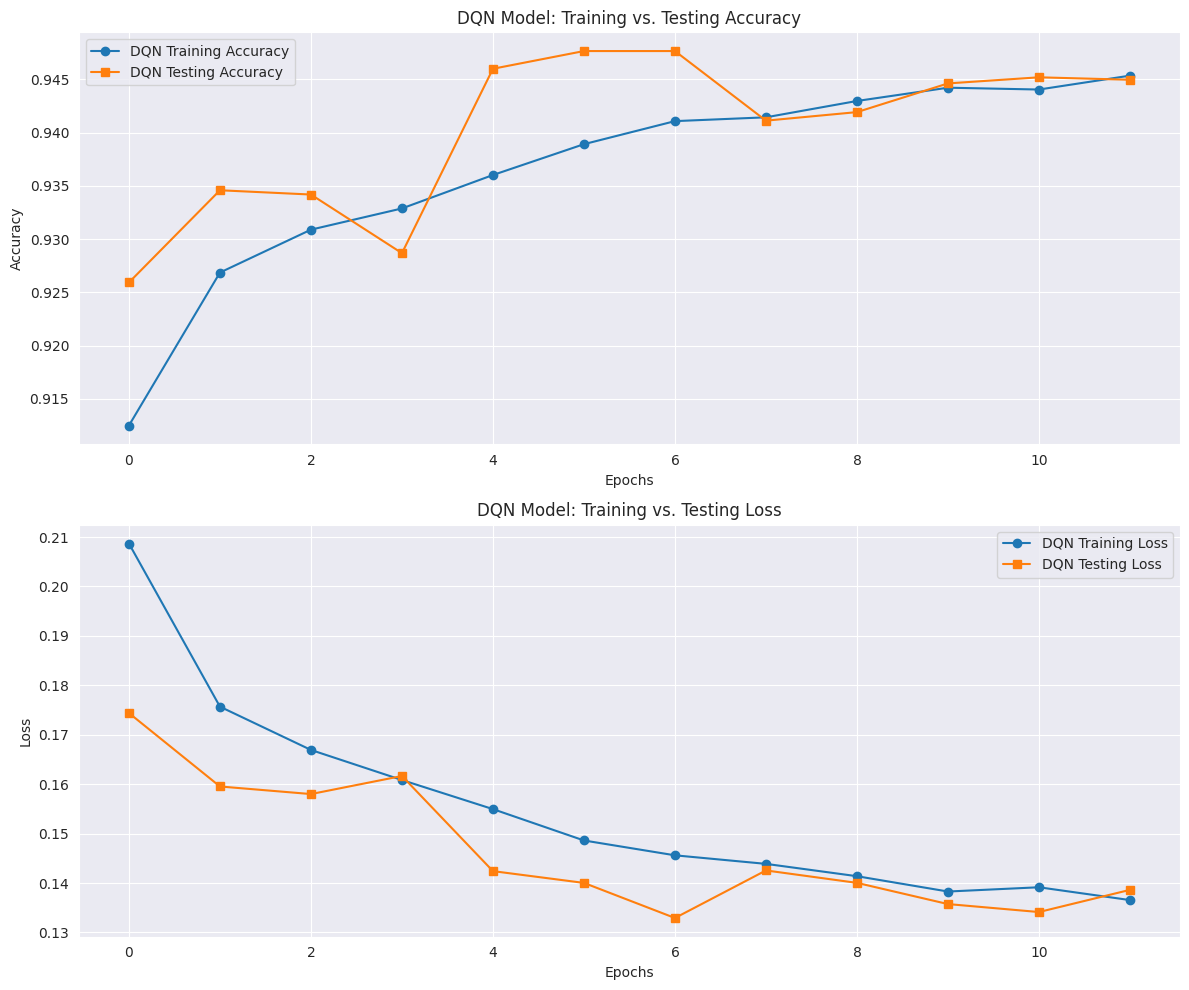

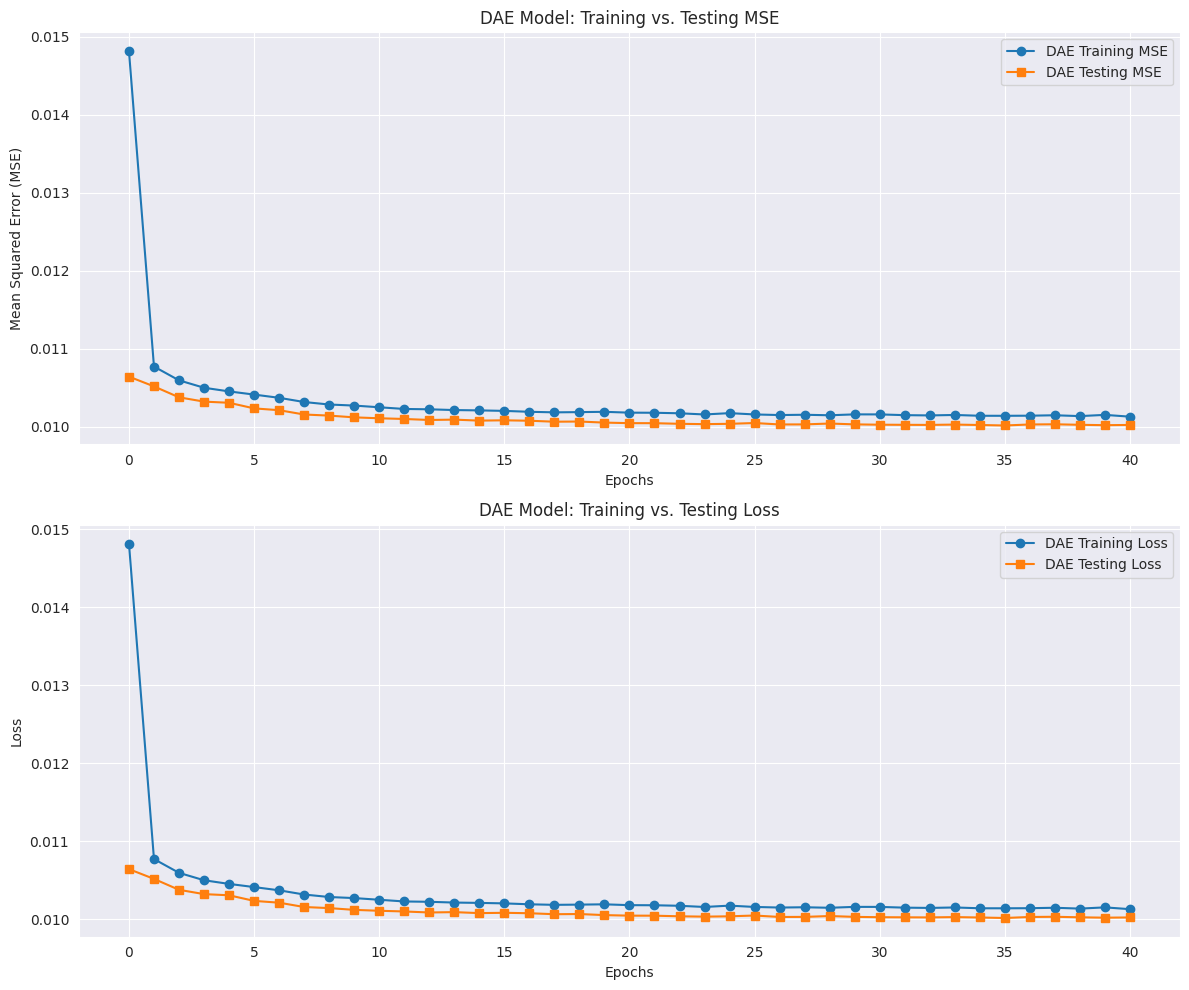

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# DQN Accuracy
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(history_dqn.history['accuracy'], label='DQN Training Accuracy', marker='o')
plt.plot(history_dqn.history['val_accuracy'], label='DQN Testing Accuracy', marker='s')
plt.title("DQN Model: Training vs. Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# DQN Loss
plt.subplot(2, 1, 2)  # Second plot
plt.plot(history_dqn.history['loss'], label='DQN Training Loss', marker='o')
plt.plot(history_dqn.history['val_loss'], label='DQN Testing Loss', marker='s')
plt.title("DQN Model: Training vs. Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))

# DAE MSE (Accuracy Equivalent)
plt.subplot(2, 1, 1)
plt.plot(history_dae.history['mse'], label='DAE Training MSE', marker='o')
plt.plot(history_dae.history['val_mse'], label='DAE Testing MSE', marker='s')
plt.title("DAE Model: Training vs. Testing MSE")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()

# DAE Loss
plt.subplot(2, 1, 2)
plt.plot(history_dae.history['loss'], label='DAE Training Loss', marker='o')
plt.plot(history_dae.history['val_loss'], label='DAE Testing Loss', marker='s')
plt.title("DAE Model: Training vs. Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


